In [31]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the dataset
df = pd.read_csv('./TaxiData.csv')

```
Analysis on overall Dataset.
Provide info about columns and its Datatypes.
State missing values and other organic analysis.
```

# Q 1

## Q 1.1

In [33]:
df.describe()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,trip_seconds,dropoff_community_area,tips
count,15000.000000,15002.000000,15002.000000,15002.000000,15002.000000,1.500200e+04,15000.000000,15000.000000,14520.000000,14520.000000,15002.000000,1.000000e+00,1.076100e+04,14996.000000,14496.000000,15002.000000
mean,22.250267,11.768216,6.585655,13.632316,4.186642,1.408495e+09,41.903046,-87.657551,41.899786,-87.648077,2.872820,1.703108e+10,1.703135e+10,777.627501,20.966336,1.076674
std,19.414828,11.538850,3.390997,6.620927,2.015694,2.916043e+07,0.037751,0.067846,0.349865,0.729626,15.276007,NaN,3.312243e+05,977.538769,17.641307,2.158340
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.357000e+09,41.694879,-87.913625,0.000000,-87.913625,0.000000,1.703108e+10,1.703101e+10,0.000000,0.000000,0.000000
25%,8.000000,5.850000,4.000000,9.000000,2.000000,1.384622e+09,41.880994,-87.655998,41.880994,-87.656804,0.000000,1.703108e+10,1.703108e+10,360.000000,8.000000,0.000000
50%,8.000000,7.850000,7.000000,15.000000,4.000000,1.407260e+09,41.892508,-87.633308,41.893216,-87.634156,1.000000,1.703108e+10,1.703124e+10,540.000000,12.000000,0.000000
75%,32.000000,12.450000,10.000000,19.000000,6.000000,1.431339e+09,41.921877,-87.626211,41.922686,-87.626215,2.500000,1.703108e+10,1.703183e+10,960.000000,32.000000,2.000000
max,77.000000,700.070000,12.000000,23.000000,7.000000,1.483116e+09,42.009623,-87.572782,42.021224,0.000000,1710.000000,1.703108e+10,1.703198e+10,72120.000000,77.000000,47.000000


# Column Types
- pickup_community_area : Categorical
- fare : Numerical
- trip_start_month : Catergorical
- trip_start_hour : Categorical
- trip_start_day : Categorical
- trip_start_timestamp : Numerical
- pickup_latitude : Numerical
- pickup_longitude : Numerical
- dropoff_latitude : Numerical
- dropoff_longitude : Numerical
- trip_miles : Numerical
- pickup_census_tract : Numerical
- dropoff_census_tract : Numerical
- payment_type : Categorical
- company : Categorical
- trip_seconds : Numerical
- dropoff_community_area : Categorical
- tips : Numerical

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15000 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15000 non-null  float64
 7   pickup_longitude        15000 non-null  float64
 8   dropoff_latitude        14520 non-null  float64
 9   dropoff_longitude       14520 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  pickup_census_tract     1 non-null      float64
 12  dropoff_census_tract    10761 non-null  float64
 13  payment_type            15002 non-null  object 
 14  company                 9862 non-null 

## Q 1.3

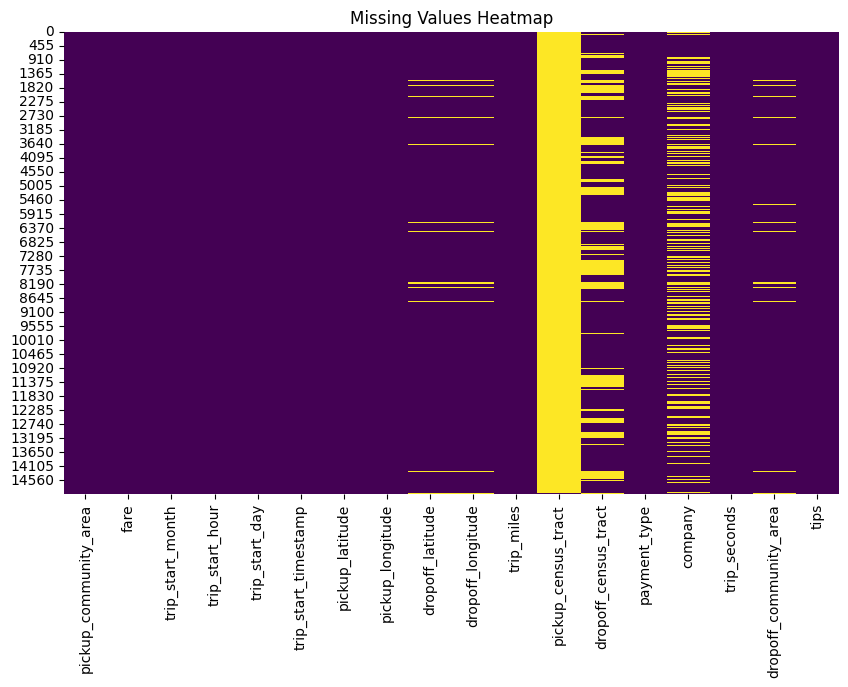

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

pickup_census_tract has all but one of its values as missing. It would be better to just delete this column since it wouldn't provide any actual information.  
Similarly, dropoff_census_tract and company have about 33% values missing. Since this number is significant, it would be beneficial if these columns were also dropped.  
The missing values for most other columns can be filled by using mean imputation.  
Also the heatmap shows that the missing values come from the same entries, so we should probably also drop these rows. If there is any additional missing data, we can use data imputation.

In [36]:
df = df.drop('pickup_census_tract', axis=1)
df = df.drop('dropoff_census_tract', axis=1)
df = df.drop('company', axis=1)
print(df)

       pickup_community_area   fare  trip_start_month  trip_start_hour  \
0                        NaN  12.45                 5               19   
1                        NaN   0.00                 3               19   
2                       60.0  27.05                10                2   
3                       10.0   5.85                10                1   
4                       14.0  16.65                 5                7   
...                      ...    ...               ...              ...   
14997                    8.0   3.25                 5               11   
14998                    8.0   3.25                11               16   
14999                    8.0   4.25                12               13   
15000                   61.0   9.85                 9               15   
15001                    8.0   7.45                 7               11   

       trip_start_day  trip_start_timestamp  pickup_latitude  \
0                   6            1400269500    

## Q 1.4

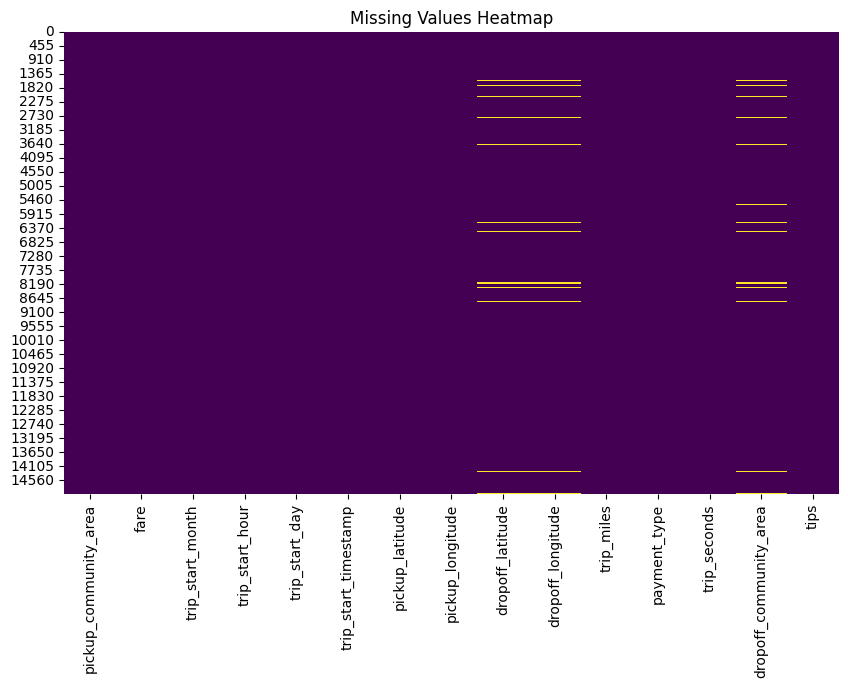

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [38]:
df.dropna(subset=['dropoff_latitude'], inplace=True)
mean_pickup_area = df['pickup_community_area'].mean()
mean_dropoff_community_area = df['dropoff_community_area'].mean()
df['dropoff_community_area'].fillna(mean_dropoff_community_area, inplace=True)
mean_trip_seconds = df['trip_seconds'].mean()
df['trip_seconds'].fillna(mean_trip_seconds, inplace=True)

C:\Users\aayus\AppData\Local\Temp\ipykernel_23860\530446097.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_community_area'].fillna(mean_dropoff_community_area, inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_23860\530446097.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

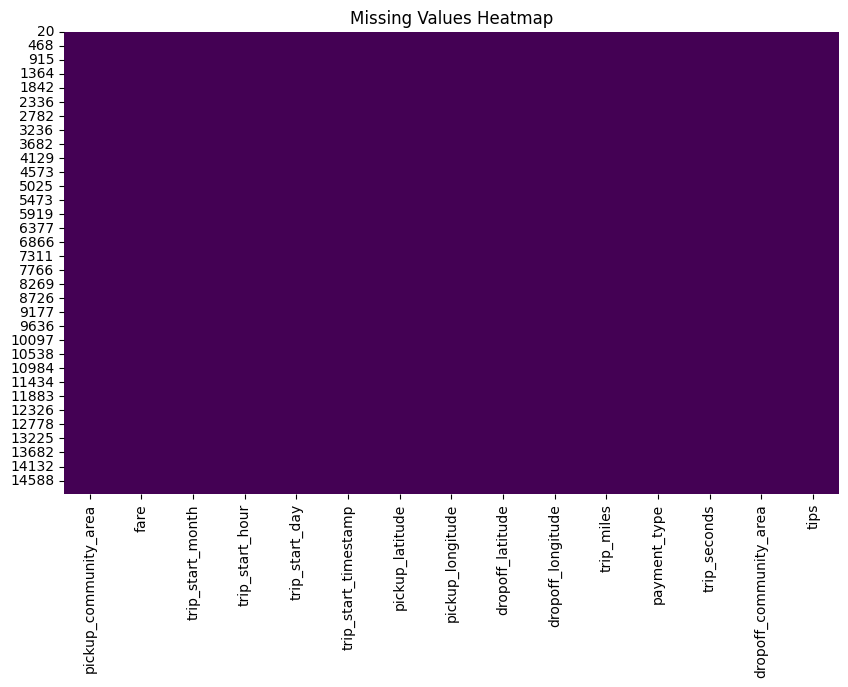

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14520 entries, 20 to 15000
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   14520 non-null  float64
 1   fare                    14520 non-null  float64
 2   trip_start_month        14520 non-null  int64  
 3   trip_start_hour         14520 non-null  int64  
 4   trip_start_day          14520 non-null  int64  
 5   trip_start_timestamp    14520 non-null  int64  
 6   pickup_latitude         14520 non-null  float64
 7   pickup_longitude        14520 non-null  float64
 8   dropoff_latitude        14520 non-null  float64
 9   dropoff_longitude       14520 non-null  float64
 10  trip_miles              14520 non-null  float64
 11  payment_type            14520 non-null  object 
 12  trip_seconds            14520 non-null  float64
 13  dropoff_community_area  14520 non-null  float64
 14  tips                    14520 non-null  fl

## Q 1.2

In [41]:
df_new = pd.get_dummies(df, columns=['payment_type'], drop_first=False)
df_new['trip_start_timestamp'] = pd.to_datetime(df_new['trip_start_timestamp'], unit='s')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14520 entries, 20 to 15000
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   pickup_community_area     14520 non-null  float64       
 1   fare                      14520 non-null  float64       
 2   trip_start_month          14520 non-null  int64         
 3   trip_start_hour           14520 non-null  int64         
 4   trip_start_day            14520 non-null  int64         
 5   trip_start_timestamp      14520 non-null  datetime64[ns]
 6   pickup_latitude           14520 non-null  float64       
 7   pickup_longitude          14520 non-null  float64       
 8   dropoff_latitude          14520 non-null  float64       
 9   dropoff_longitude         14520 non-null  float64       
 10  trip_miles                14520 non-null  float64       
 11  trip_seconds              14520 non-null  float64       
 12  dropoff_community_area

# Q2

## Q 2.a

C:\Users\aayus\AppData\Local\Temp\ipykernel_23860\3416578104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trip_start_hour', data=df_new, palette='Blues')


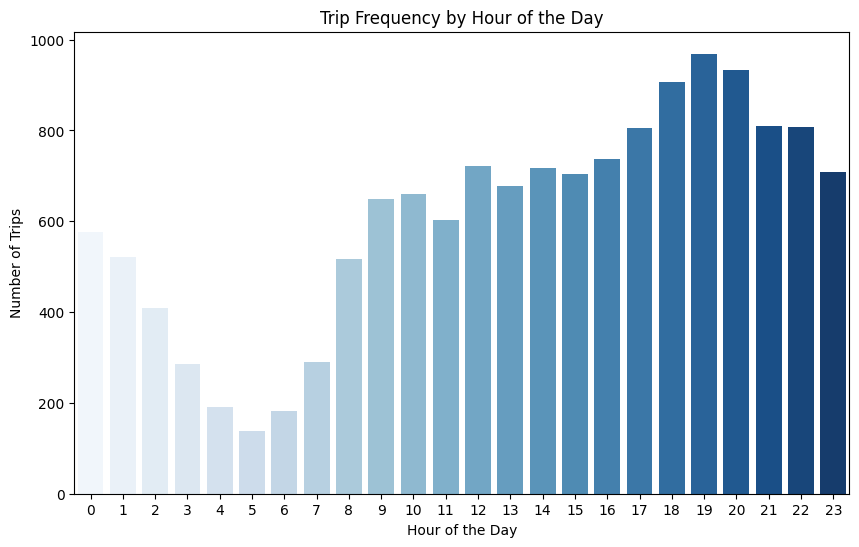

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trip_start_hour', data=df_new, palette='Blues')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

##### The frequency dips near dawn (5 AM) and increases till 9AM where it stays about constant till 4PM and increases again and peaks at 7PM then reduces until 5AM.

C:\Users\aayus\AppData\Local\Temp\ipykernel_23860\821121894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trip_start_day', data=df, palette='Greens')


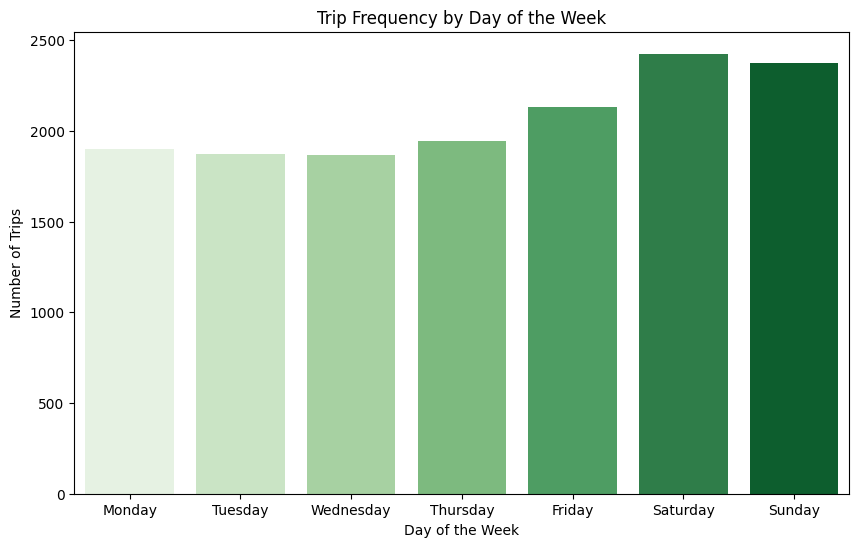

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trip_start_day', data=df, palette='Greens')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

##### Trip frequency increases near the weekend peaking on Saturday

C:\Users\aayus\AppData\Local\Temp\ipykernel_23860\1870090301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trip_start_month', data=df, palette='Purples')


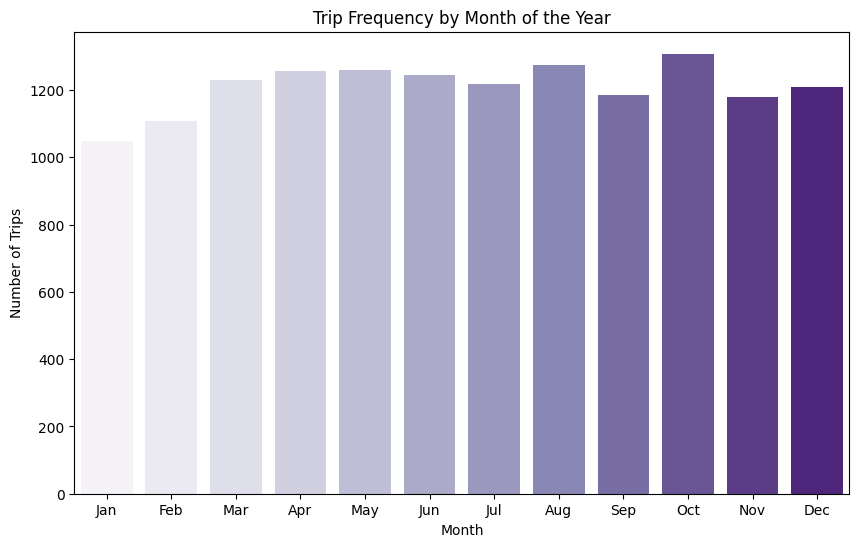

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trip_start_month', data=df, palette='Purples')
plt.title('Trip Frequency by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### The number of trips per month is almost constant having a minimum at Jan and maximum at October

## Q 2.b

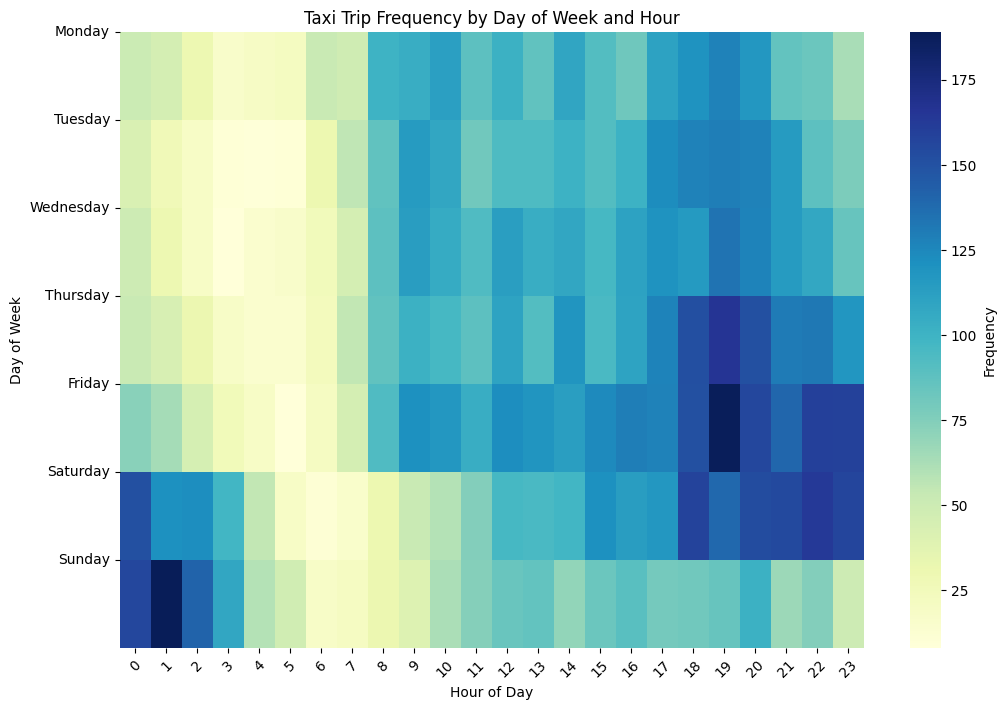

In [45]:
# Extract day of the week and hour from the timestamp
df_new['day_of_week'] = df_new['trip_start_timestamp'].dt.dayofweek
df_new['hour'] = df_new['trip_start_timestamp'].dt.hour

# Group by day of the week and hour to get the frequency
heatmap_data = df_new.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='d', cbar_kws={'label': 'Frequency'})
plt.title('Taxi Trip Frequency by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.xticks(rotation=45)
plt.show()

From the graph, the peak hours are clearly between 5PM to 10PM

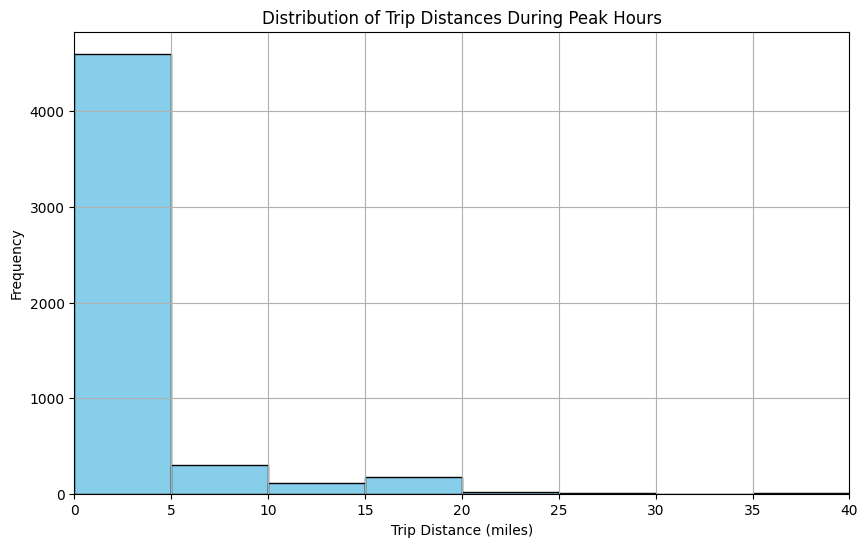

In [46]:
# Define peak hours (7-9 AM and 4-7 PM)
peak_hours = df_new[(df_new['trip_start_hour'] >= 17) & (df_new['trip_start_hour'] <= 22)]

# Define range and bins for the histogram
dist_range = (0, 40)
bin_width = 5
bins = np.arange(dist_range[0], dist_range[1] + bin_width, bin_width)

# Plot histogram for trip distances during peak hours
plt.figure(figsize=(10, 6))
plt.hist(peak_hours['trip_miles'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Distances During Peak Hours')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(dist_range)
plt.grid(True)
plt.show()

Most of the rides are within 5 miles in the peak hours. This implies that people prefer to take shorter trips within this time (potentially from their workplace to their home). This also means that during this time, there is more wait time since the demand is really high. Additionally since the trips are short, most of the time would be spent on pickups and dropoffs. This would lead to a higher congestion. Also since most of the trips are within a certain area, drivers would be less incentivised to go further away since they might get more rides in the same area.

## Q 2.c

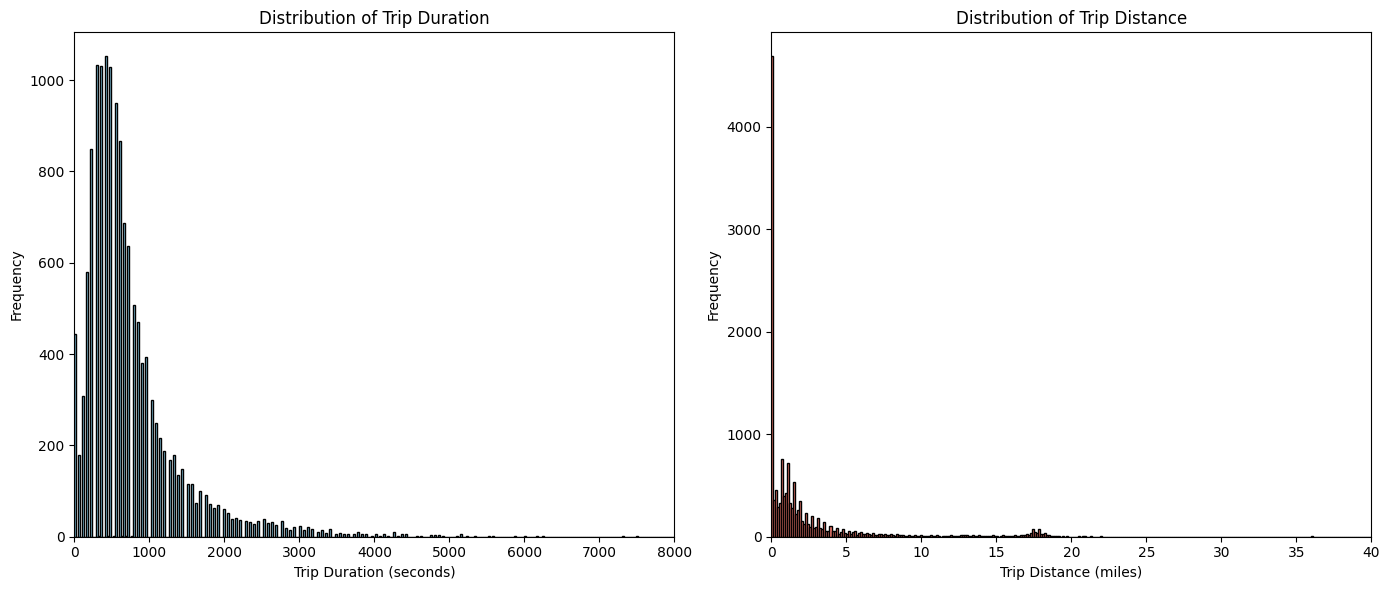

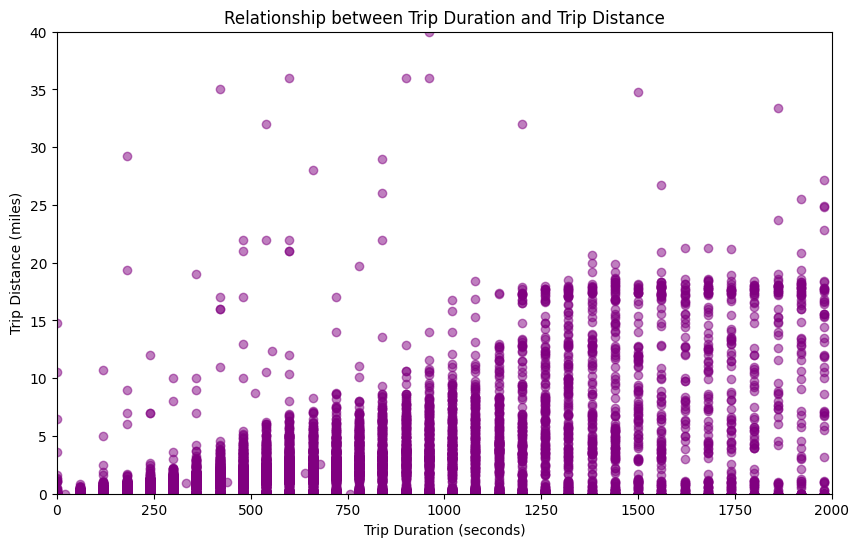

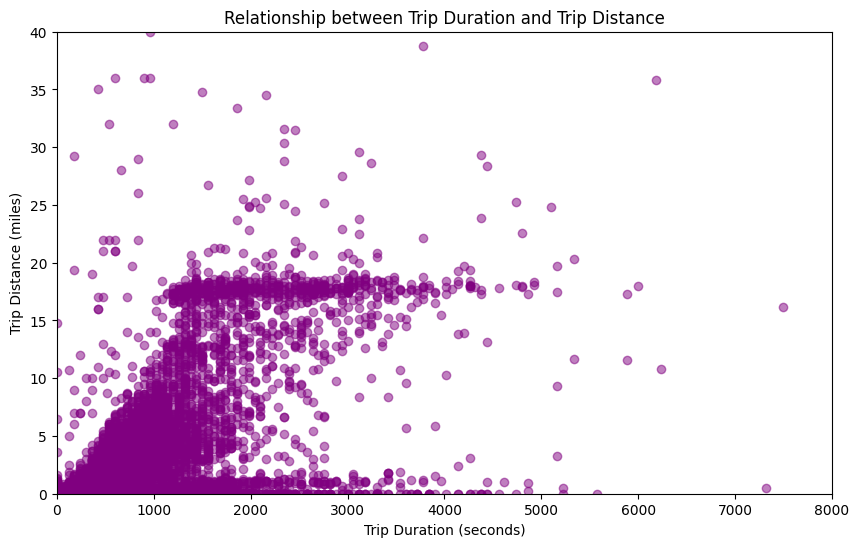

In [47]:
# Set the range and bin size for trip duration and trip distance based on actual data
duration_range = (df_new['trip_seconds'].min(), 8000)
distance_range = (df_new['trip_miles'].min(), 40)

# Plot histograms with adjusted ranges
plt.figure(figsize=(14, 6))

# Trip Duration Histogram
plt.subplot(1, 2, 1)
plt.hist(df_new['trip_seconds'], bins=np.linspace(*duration_range, 300), color='skyblue', edgecolor='black')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.xlim(duration_range)  # Set x-axis to match the full range of trip duration

# Trip Distance Histogram
plt.subplot(1, 2, 2)
plt.hist(df_new['trip_miles'], bins=np.linspace(*distance_range, 300), color='salmon', edgecolor='black')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance')
plt.xlim(distance_range)  # Set x-axis to match the full range of trip distance

plt.tight_layout()
plt.show()

# Scatter plot with adjusted axis limits
plt.figure(figsize=(10, 6))
plt.scatter(df_new['trip_seconds'], df_new['trip_miles'], alpha=0.5, color='purple')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Distance (miles)')
plt.title('Relationship between Trip Duration and Trip Distance')

# Set limits based on the data range to spread values across the plot
plt.xlim((0, 2000))
plt.ylim(distance_range)

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_new['trip_seconds'], df_new['trip_miles'], alpha=0.5, color='purple')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Distance (miles)')
plt.title('Relationship between Trip Duration and Trip Distance')

plt.xlim(duration_range)
plt.ylim(distance_range)

plt.show()

Most trips are within 5 miles. However, there is a small portion of trips that are 17-18 miles far. This could be for people who don't live within the main part of the city.  
Most of the trips are about 10 minutes long. The frequency of trips keeps decreasing beyond that.

In the start, for short trips (< 2000 seconds), we can see that the trip duration and distance are somewhat correlated (at least the maximum distance and duration). Given a particular time, the maximum distance (excluding outliers) covered is linearly related. Beyond that however, for certain rides of distances between 15-20 miles the time can vary from 1000 seconds to 4000 seconds. In between the data seems relatively uncorrelated.

## Q 2.d

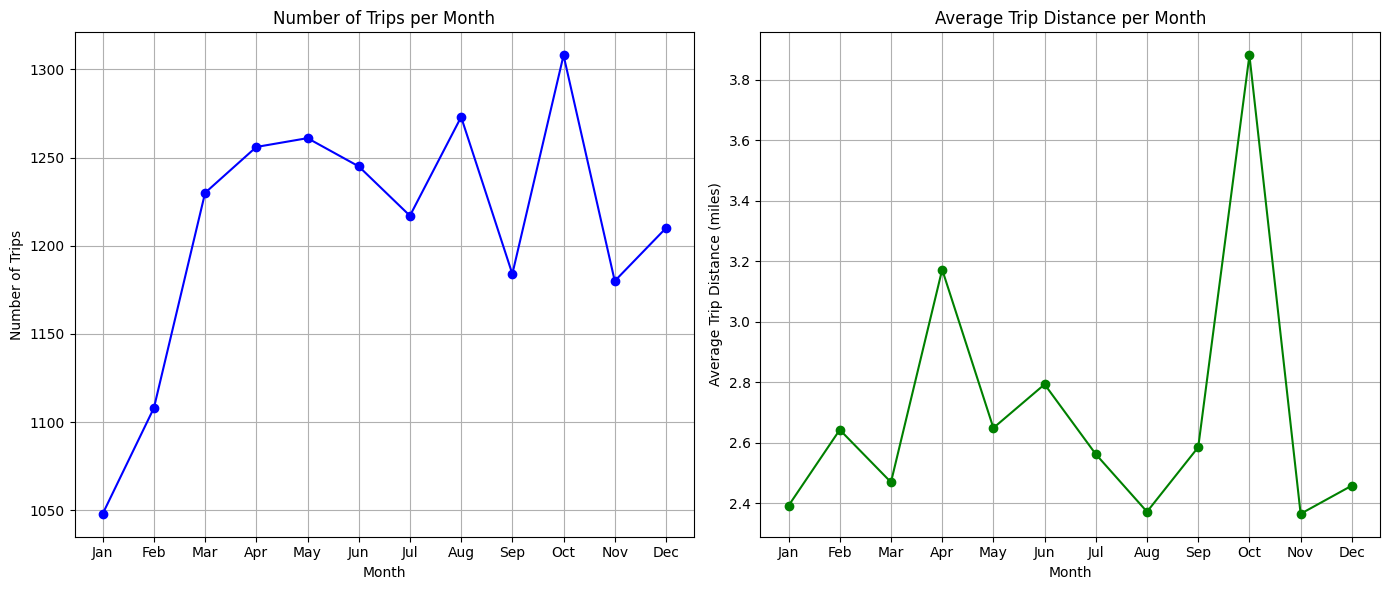

In [48]:
# Group data by month to get the total number of trips and average trip distance
monthly_data = df_new.groupby('trip_start_month').agg(
    num_trips=('trip_miles', 'size'),  # Count of trips
    avg_distance=('trip_miles', 'mean')  # Average trip distance
).reset_index()

# Line plot for the number of trips
plt.figure(figsize=(14, 6))

# Number of Trips by Month
plt.subplot(1, 2, 1)
plt.plot(monthly_data['trip_start_month'], monthly_data['num_trips'], marker='o', color='b', label='Number of Trips')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()

# Average Trip Distance by Month
plt.subplot(1, 2, 2)
plt.plot(monthly_data['trip_start_month'], monthly_data['avg_distance'], marker='o', color='g', label='Average Trip Distance')
plt.xlabel('Month')
plt.ylabel('Average Trip Distance (miles)')
plt.title('Average Trip Distance per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()

plt.tight_layout()
plt.show()


The number of long trips increases in April and October (mainly October). This could be for certain festivals that happen in these months. Also, the number of trips starts of very low in the start of the year, increase March onwards (possible due to Summer vacations) and peaks in October.

## Q 2.e

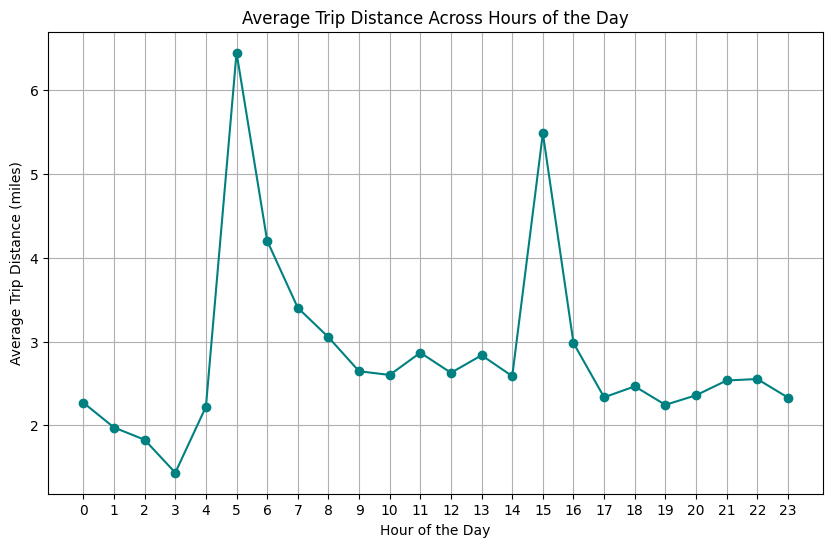

In [49]:
# Group data by hour to calculate the average trip distance for each hour
hourly_distance_data = df_new.groupby('trip_start_hour').agg(
    avg_distance=('trip_miles', 'mean')
).reset_index()

# Line plot for average trip distance by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_distance_data['trip_start_hour'], hourly_distance_data['avg_distance'], marker='o', color='teal')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.title('Average Trip Distance Across Hours of the Day')
plt.xticks(range(0, 24))  # Set x-axis to display each hour
plt.grid()
plt.show()


People travel the furthest at the beginning of the day (5AM) and sometime in the afternoon (3PM). This could be for remote jobs where people live far away. The distance otherwise is more or less constant and is low during midnight since people don't travel far during the night (1AM-3AM).

# Q 3

## Q 3.a

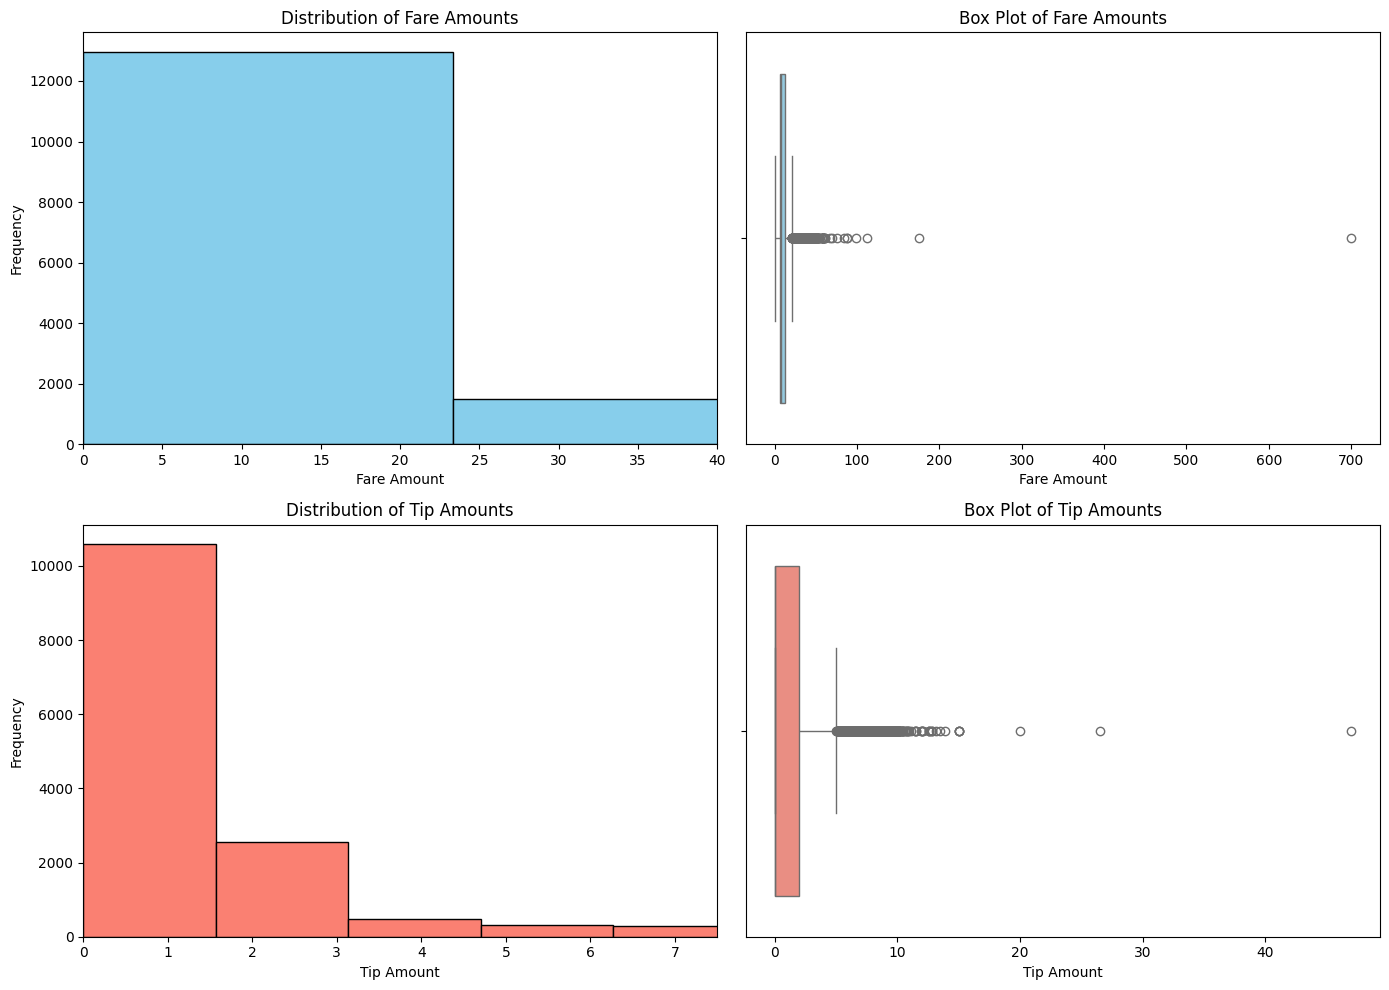

In [50]:
# Set up the figure for histograms and box plots
plt.figure(figsize=(14, 10))

fare_range = (df_new['fare'].min(), 40)
tips_range = (df_new['tips'].min(), 7.5)

# Histogram and box plot for Fare
plt.subplot(2, 2, 1)
plt.hist(df_new['fare'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts')
plt.xlim(fare_range)

plt.subplot(2, 2, 2)
sns.boxplot(x=df_new['fare'], color='skyblue')
plt.xlabel('Fare Amount')
plt.title('Box Plot of Fare Amounts')

# Histogram and box plot for Tips
plt.subplot(2, 2, 3)
plt.hist(df_new['tips'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Amounts')
plt.xlim(tips_range)

plt.subplot(2, 2, 4)
sns.boxplot(x=df_new['tips'], color='salmon')
plt.xlabel('Tip Amount')
plt.title('Box Plot of Tip Amounts')

plt.tight_layout()
plt.show()

The far is mostly between 3-15 dollars. Since long distance trips were also slightly common, 35 dollars is also a common fare. There is a trip with fare 700 dollars which is clearly an outlier.  
  
Most people do not leave a tip. If they do, it's mostly 1-2 dollars. There are some outliers, for example someone gave a tip of 47 dollars.

In [51]:
# Statistical summary for fare and tips
fare_summary = {
    'mean': df_new['fare'].mean(),
    'median': df_new['fare'].median(),
    'std_dev': df_new['fare'].std(),
    'min': df_new['fare'].min(),
    'max': df_new['fare'].max()
}

tip_summary = {
    'mean': df_new['tips'].mean(),
    'median': df_new['tips'].median(),
    'std_dev': df_new['tips'].std(),
    'min': df_new['tips'].min(),
    'max': df_new['tips'].max()
}

fare_summary, tip_summary


({'mean': 11.321727272727271,
  'median': 7.85,
  'std_dev': 11.006953382380532,
  'min': 0.0,
  'max': 700.07},
 {'mean': 1.0355440771349862,
  'median': 0.0,
  'std_dev': 2.031518884653333,
  'min': 0.0,
  'max': 47.0})

Most of the fares are between 3-13 as stated earlier. The standard deviation is quite high due to the number of substantial long trips (17-18 miles) which skews the data.  

Majority of the people (> 75%) do not leave a tip and even if they do, it is 1-2 dollars. Some outliers like tipping 47 dollars increases the standard deviation slightly but even these are quite rare.

## Q 3.b

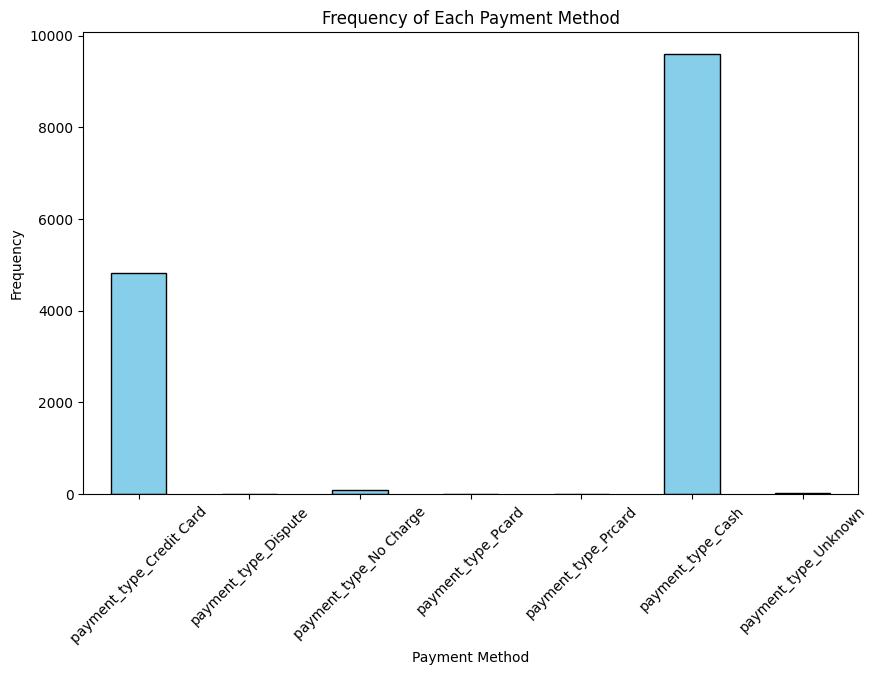

In [52]:
# Sum each payment method column to get the count
payment_methods = df_new[['payment_type_Credit Card', 'payment_type_Dispute', 'payment_type_No Charge',
                          'payment_type_Pcard', 'payment_type_Prcard', 'payment_type_Cash', 'payment_type_Unknown']].sum()

# Plot bar chart for payment methods
plt.figure(figsize=(10, 6))
payment_methods.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency of Each Payment Method')
plt.xticks(rotation=45)
plt.show()


Most payments are done via cash and credit cards. Some payments are not charged. There are a few unknown payments methods. People are more willing to pay using cash rather than credit card for taxi rides. Since credit cards are also used often, the merchant does lose about 1-2% dependening on the bank. There are also a few no-charge payments which may cause drivers to lose money if the percentage increases. The other modes of payment are extremely rare and do not make any meaningful difference.

## Q 3.c

C:\Users\aayus\AppData\Local\Temp\ipykernel_23860\1745555560.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_method', y='tips', data=df_new, palette='Set2')


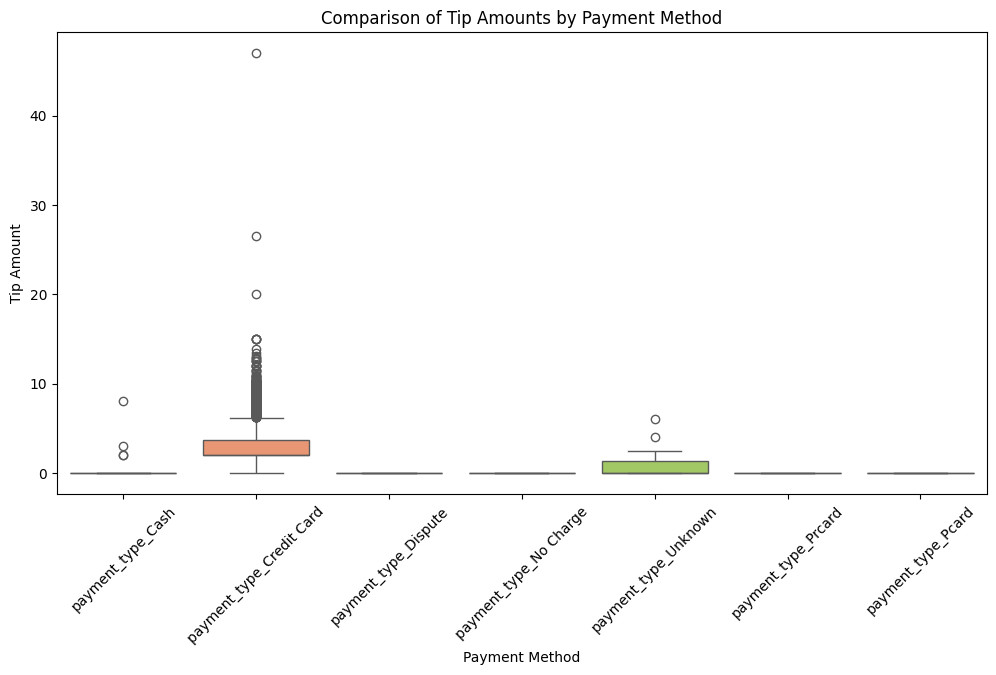

In [53]:
payment_method_columns = [
    'payment_type_Credit Card', 'payment_type_Dispute', 'payment_type_No Charge',
    'payment_type_Pcard', 'payment_type_Prcard', 'payment_type_Cash', 'payment_type_Unknown'
]

# Create a new column to store the payment method
df_new['payment_method'] = 'Unknown'
for payment_column in payment_method_columns:
    df_new.loc[df_new[payment_column] == 1, 'payment_method'] = payment_column

# Create box plot for tips by payment method
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_method', y='tips', data=df_new, palette='Set2')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.title('Comparison of Tip Amounts by Payment Method')
plt.xticks(rotation=45)
plt.show()


People with credit cards tip the most, mostly within the range 2-4 dollars, followed by unknown modes of payment that tip between 0-1 dollars with a few outliers. People with cash also occasionally tip sometimes between 2-6 dollars. The remaining modes do not tip although nothing conclusive can be said about Pcards and Prcards since there are too few of them. No charge and dispute do not give tips.

## Q 3.d

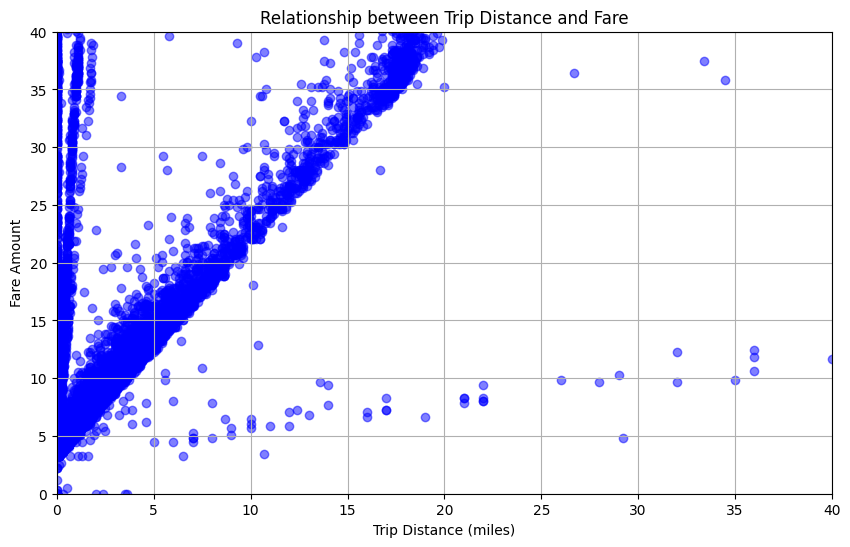

In [54]:
# Scatter plot of fare vs. trip distance
fare_range = (df_new['fare'].min(), 40)
distance_range = (df_new['trip_miles'].min(), 40)
plt.figure(figsize=(10, 6))
plt.scatter(df_new['trip_miles'], df_new['fare'], alpha=0.5, color='blue')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.title('Relationship between Trip Distance and Fare')
plt.grid()
plt.xlim(distance_range)
plt.ylim(fare_range)
plt.show()

In [55]:
# Calculate the correlation coefficient
correlation_coefficient = df_new['trip_miles'].corr(df_new['fare'])
correlation_coefficient

0.20674510062971896

There are about 4 linear trends that can be seen within the distance-fare graph.  
One trend is adding 0.226 dollars per mile travelled.
The others are 0.54 dollars per mile, another which charges 16 dollars per mile and one that charges a constant 36 dollars.

# Q 4

## Q 4.a

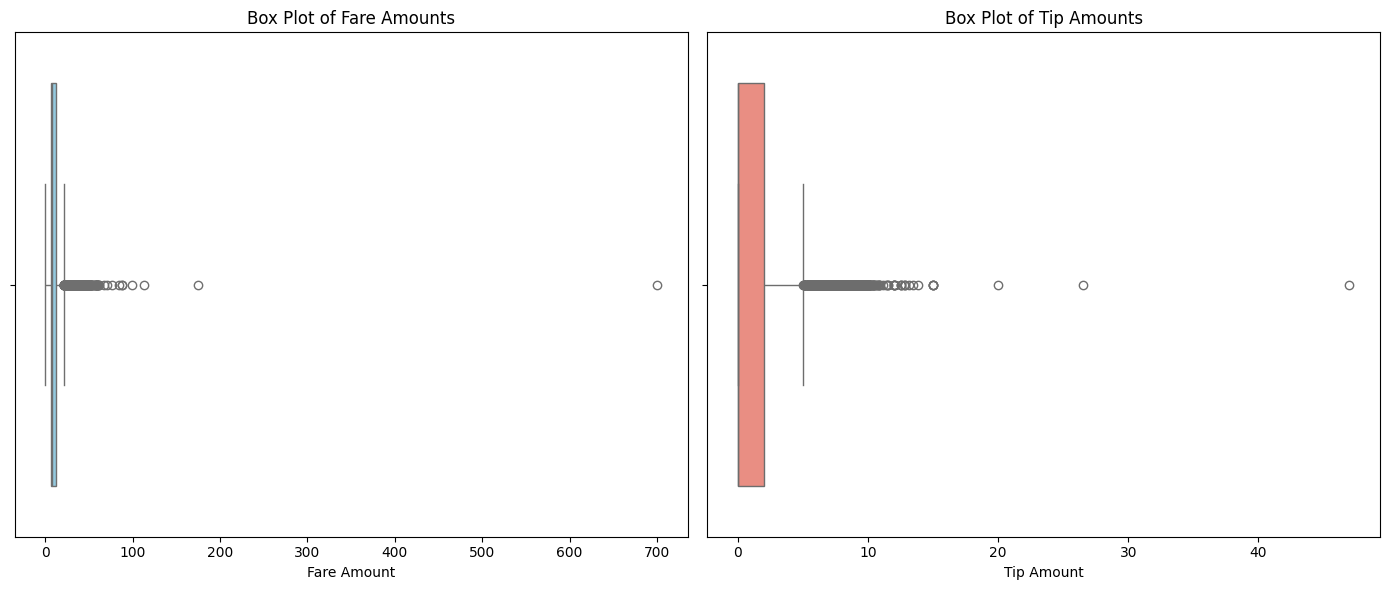

In [56]:
# Set up the figure for box plots
plt.figure(figsize=(14, 6))

# Box plot for Fare
plt.subplot(1, 2, 1)
sns.boxplot(x=df_new['fare'], color='skyblue')
plt.xlabel('Fare Amount')
plt.title('Box Plot of Fare Amounts')

# Box plot for Tips
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['tips'], color='salmon')
plt.xlabel('Tip Amount')
plt.title('Box Plot of Tip Amounts')

plt.tight_layout()
plt.show()

In [57]:
# Remove outliers based on IQR
Q1_fare = df_new['fare'].quantile(0.25)
Q3_fare = df_new['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
fare_filtered = df_new[(df_new['fare'] >= (Q1_fare - 1.5 * IQR_fare)) & (df_new['fare'] <= (Q3_fare + 1.5 * IQR_fare))]

Q1_tip = df_new['tips'].quantile(0.25)
Q3_tip = df_new['tips'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip
tips_filtered = df_new[(df_new['tips'] >= (Q1_tip - 1.5 * IQR_tip)) & (df_new['tips'] <= (Q3_tip + 1.5 * IQR_tip))]


In [58]:
# Cap fare and tips at the 95th percentile
cap_fare = df_new['fare'].quantile(0.95)
cap_tip = df_new['tips'].quantile(0.95)
df_new['fare'] = df_new['fare'].clip(upper=cap_fare)
df_new['tips'] = df_new['tips'].clip(upper=cap_tip)

The outlier with fare amount 700 will significantly skew the averages towards larger values.
Similarly the outlier with Tip amount more than 40 will also significantly skew the average tip amount towards the larger value

Two largest values above the median can be removed to handle these outliers.

## Q 4.b

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = df_new[['trip_miles', 'trip_seconds', 'pickup_community_area', 'dropoff_community_area']]
target = df_new['fare']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [60]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5.758563723708952

Linear Regression model is quite effective for estimating fares. It gives an RMSE of 5.76, which is decent. The fit can be improved by handling outliers.